Variável  | Descrição
------- | --------
school   | Colégio onde foram realizadas as pesquisas
sex   | Sexo do estudante

# FALTA AJUSTAR OS MARKDOWNS

# Projeto final - Técnicas de programação II

- Hallynny Henrique Barros
- João Vítor Dias Ferraz
- Samira Vidal de Lima

## Dataset - Student Performance Dataset.
Fonte: https://www.kaggle.com/datasets/devansodariya/student-performance-data


## Descrição geral do problema

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py



In [2]:
df_edu = pd.read_csv('student_data.csv')
df_edu.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df_edu['media'] = (df_edu['G1']+df_edu['G2']+df_edu['G3'])/3
df_edu.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,media
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


In [4]:
df_edu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [5]:
df_edu.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,media
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


In [348]:
import random


def sample(n):
    colors = sns.color_palette("pastel").as_hex()
    nossa_lista = []
    for i in range(n):
        aleatorio = random.randint(0, len(colors)-1)
        while colors[aleatorio] in nossa_lista:
            aleatorio = random.randint(0, len(colors)-1)
        nossa_lista.append(colors[aleatorio])
    return nossa_lista


In [349]:
sample(2)


['#ff9f9b', '#fffea3']

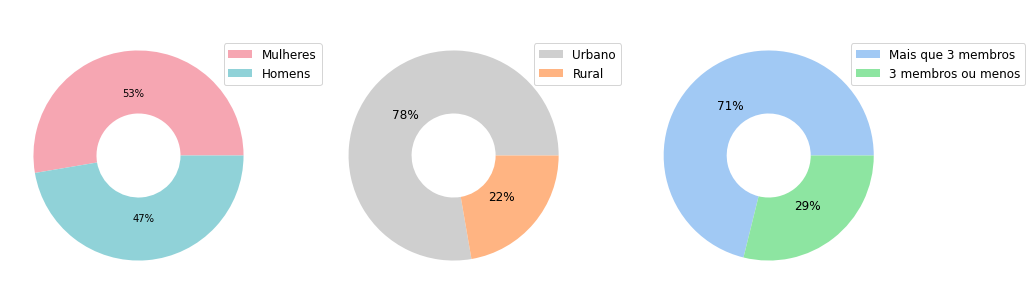

In [350]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))


df_edu.value_counts('sex').plot(kind='pie', ax=ax[0], radius=1, wedgeprops={
    "width": 0.6}, autopct='%1.0f%%', figsize=(16, 8), colors=['#f6a6b2', '#90d2d8'], labeldistance=None)
ax[0].set_title('Gênero dos alunos', color='white', fontsize=15)
ax[0].legend(['Mulheres', 'Homens'], loc='upper right',
             fontsize=12, bbox_to_anchor=(1.22, .95))
ax[0].set_ylabel("")


df_edu['address'].value_counts().plot(kind='pie', fontsize=12, autopct='%1.0f%%', radius=1, wedgeprops={
    "width": 0.6}, figsize=(16, 8), colors=sample(2), labeldistance=None, ax=ax[1])
ax[1].set_title('Distribuição dos locais de moradia dos alunos',
                color='white', fontsize=15)
ax[1].legend(['Urbano', 'Rural'], loc='upper right',
             fontsize=12, bbox_to_anchor=(1.16, 0.95))
ax[1].set_ylabel("")

df_edu['famsize'].value_counts().plot(kind='pie', fontsize=12, autopct='%1.0f%%', radius=1, wedgeprops={
    "width": 0.6}, figsize=(16, 8), colors=sample(2), labeldistance=None, ax=ax[2])
ax[2].set_title('Tamanho da família dos alunos', color='white', fontsize=15)
ax[2].legend(['Mais que 3 membros', '3 membros ou menos'],
             loc='upper right', fontsize=12, bbox_to_anchor=(1.50, 0.95))
ax[2].set_ylabel("")


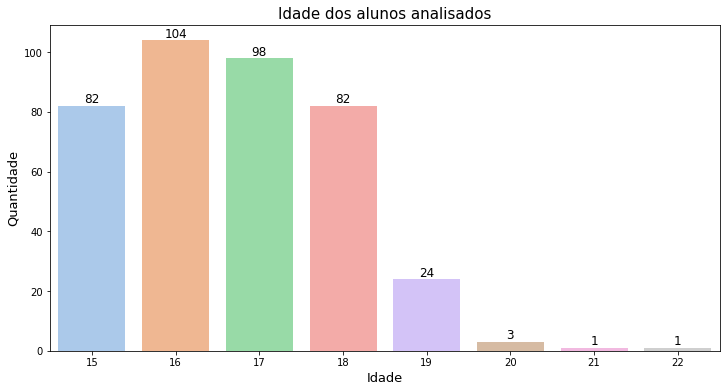

In [351]:
plt.figure(figsize=(12, 6))
age = sns.countplot(data=df_edu, x='age', palette='pastel')
age.bar_label(age.containers[0], fontsize=12)
age.set_xlabel('Idade', fontsize=13)
age.set_ylabel('Quantidade', fontsize=13)
age.set_title('Idade dos alunos analisados', fontsize=15)


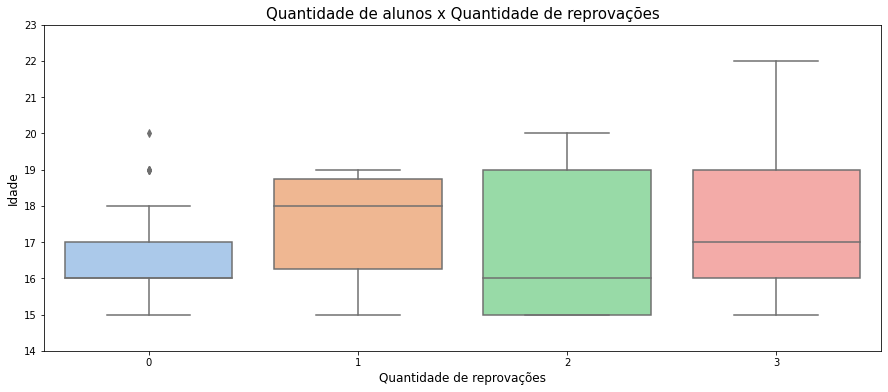

In [268]:
data = pd.concat([df_edu['age'], df_edu['failures']], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x="failures", y="age", data=data, palette='pastel')
fig.axis(ymin=14, ymax=23)
fig.set_title('Quantidade de alunos x Quantidade de reprovações', fontsize=15)
fig.set_ylabel('Idade', fontsize=12)
fig.set_xlabel('Quantidade de reprovações', fontsize=12)


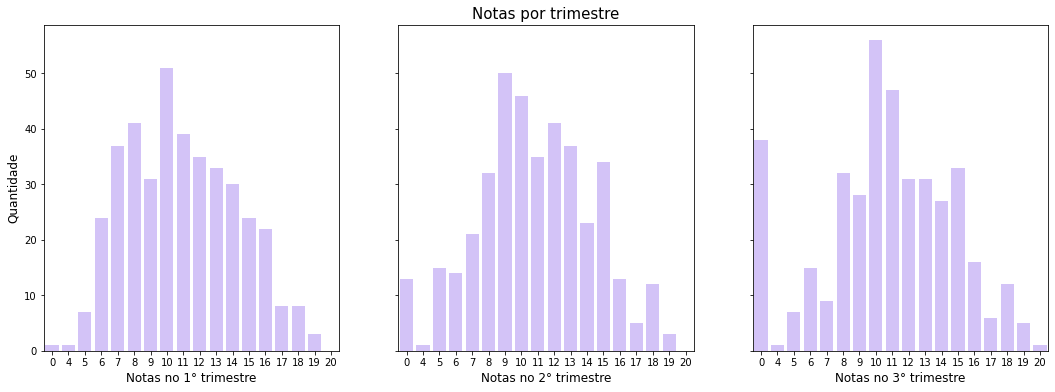

In [354]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True, sharex=True)
cor_escolhida = sample(1)
sns.countplot(data=df_edu, x='G1', ax=ax[0], color=cor_escolhida[0])
sns.countplot(data=df_edu, x='G2', ax=ax[1], color=cor_escolhida[0])
sns.countplot(data=df_edu, x='G3', ax=ax[2], color=cor_escolhida[0])
ax[1].set_title('Notas por trimestre', fontsize=15)
ax[0].set_xlabel('Notas no 1° trimestre', fontsize=12)
ax[1].set_xlabel('Notas no 2° trimestre', fontsize=12)
ax[2].set_xlabel('Notas no 3° trimestre', fontsize=12)
ax[0].set_ylabel('Quantidade', fontsize=12)
ax[1].set_ylabel('')
ax[2].set_ylabel('')


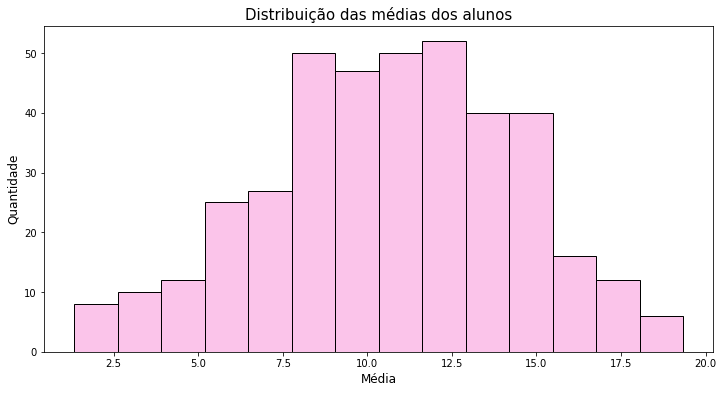

In [355]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_edu, x='media', color=sample(1)[0])
plt.title('Distribuição das médias dos alunos', fontsize=15)
plt.ylabel('Quantidade', fontsize=12)
plt.xlabel('Média', fontsize=12)


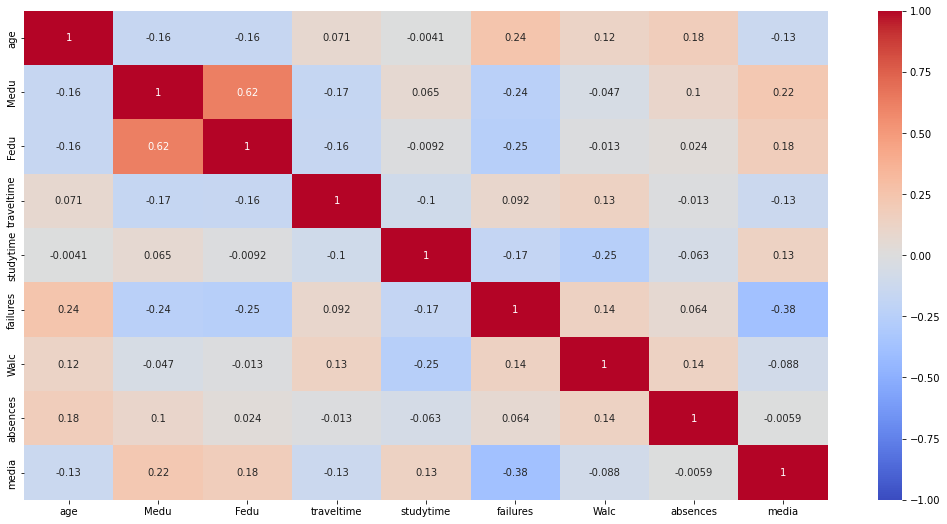

In [357]:
plt.figure(figsize=(18, 9))
sns.heatmap(df_edu.loc[:, ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
            'Walc', 'absences', 'media']].corr(), cmap='coolwarm', vmin=-1, annot=True)


In [378]:
pais = pd.concat([df_edu.value_counts('Medu'),
                 df_edu.value_counts('Fedu')], axis=1).sort_index()
Mulheres = go.Bar(x=['SE', 'EF1', 'EF2', 'EM', 'ES'],
                  y=pais[1],
                  name='Mães',
                  marker_color='pink',
                  marker_line_color='black',
                  marker_line_width=1.5)
Pais = go.Bar(x=['SE', 'EF1', 'EF2', 'EM', 'ES'],
              y=pais[0],
              name='Pais',
              marker_color='lightblue',
              marker_line_color='black',
              marker_line_width=1.5)
data = [Mulheres, Pais]
layout = go.Layout(
    title={
        'text': 'Distribuição da escolaridade dos pais',
        'y': 0.95,
        'x': 0.5,
        'font_color': 'black'
    },
    width=800,
    height=400,
    titlefont={'family': 'Arial', 'size': 15},
    yaxis={'title': 'Distribuição'},
    xaxis={'title': 'Escolaridade'},
    title_x=0.5)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [386]:
médias_pais = pd.concat([df_edu.groupby(by='Medu').mean(
)['media'], df_edu.groupby(by='Fedu').mean()['media']], axis=1)
médias_pais.columns = ['Pai', 'Mãe']
Mulheres = go.Bar(x=['EF1', 'EF2', 'EM', 'ES'],
                  y=médias_pais['Mãe'][1:],
                  name='Mães',
                  marker_color='pink',
                  marker_line_color='black',
                  marker_line_width=1.5)
Pais = go.Bar(x=['EF1', 'EF2', 'EM', 'ES'],
              y=médias_pais['Pai'][1:],
              name='Pais',
              marker_color='lightblue',
              marker_line_color='black',
              marker_line_width=1.5)
data = [Mulheres, Pais]
layout = go.Layout(
    title={
        'text': 'Distribuição da escolaridade dos pais',
        'y': 0.95,
        'x': 0.5,
        'font_color': 'black'
    },
    width=800,
    height=400,
    titlefont={'family': 'Arial', 'size': 15},
    yaxis={'title': 'Média'},
    xaxis={'title': 'Escolaridade'},
    title_x=0.5)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [385]:
df_tempo = df_edu.groupby(by='traveltime').mean()['media']
df_tempo.index = ['<15', 'entre 15 e 30', 'entre 30 e 60', '>60']
fig = px.bar(df_tempo, text_auto='.2f')
fig.update_layout(
    xaxis_title='Tempo de viagem (minutos)',
    yaxis_title="Média alunos",
    showlegend=False,
    legend_title="",
    width=800,
    height=400,
    titlefont={'family': 'Arial', 'size': 15},
    title={
        'text': 'Média dos alunos pelo tempo de viagem',
        'y': 0.95,
        'x': 0.5,
        'font_color': 'black'
    })
fig.update_traces(marker_color=sample(1)[0], marker_line_color='black',
                  marker_line_width=1.5)


In [390]:
fig = px.box(data_frame=df_edu, x='absences')
fig.update_layout(
    xaxis_title='Quantidade de faltas',
    titlefont={'family': 'Arial', 'size': 15},
    width=800,
    height=400,
    title={
        'text': 'Boxplot',
        'x': 0.49,
        'y': 0.94,
        'font_color': 'black'
    },
    template='none'
)
fig.update_traces(marker_color=sample(1)[0])


In [391]:
df_media_reprovados = df_edu.groupby(by='failures').mean()['media']
fig = px.bar(df_media_reprovados, orientation='h')
fig.update_layout(
    yaxis_title="Quantidade de reprovações",
    xaxis_title='Média dos alunos',
    titlefont={'family': 'Arial', 'size': 15},
    width=800,
    height=400,
    legend_title="",
    showlegend=False,
    title={
        'text': 'Média em relação às reprovações',
        'y': 0.95,
        'x': 0.5,
        'font_color': 'black'
    })
fig.update_yaxes(tickvals=[0, 1, 2, 3])
fig.update_traces(marker_color=sample(1)[0], marker_line_color='black',
                  marker_line_width=1.5)


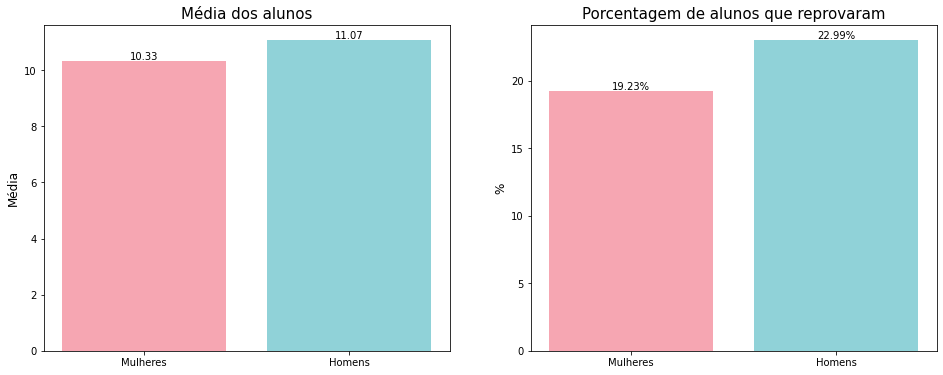

In [396]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

df_medias = df_edu.groupby(by='sex').mean()['media']
df_medias.index = ["Mulheres", "Homens"]
ax[0].bar(df_medias.index, df_medias, color=['#f6a6b2', '#90d2d8'])

df_reprovados = df_edu[df_edu['failures'] > 0].groupby(
    'sex').count()['media']/df_edu.value_counts('sex')*100
df_reprovados.index = ['Mulheres', 'Homens']
ax[1].bar(df_reprovados.index, df_reprovados, color=['#f6a6b2', '#90d2d8'])

ax[0].set_title('Média dos alunos', fontsize=15, color='black')
ax[1].set_title('Porcentagem de alunos que reprovaram',
                fontsize=15, color='black')
ax[0].set_ylabel('Média', fontsize=12, color='black')
ax[1].set_ylabel('%', fontsize=12, color='black')
ax[0].bar_label(ax[0].containers[0], fmt='%.2f')
ax[1].bar_label(ax[1].containers[0], fmt='%.2f%%')


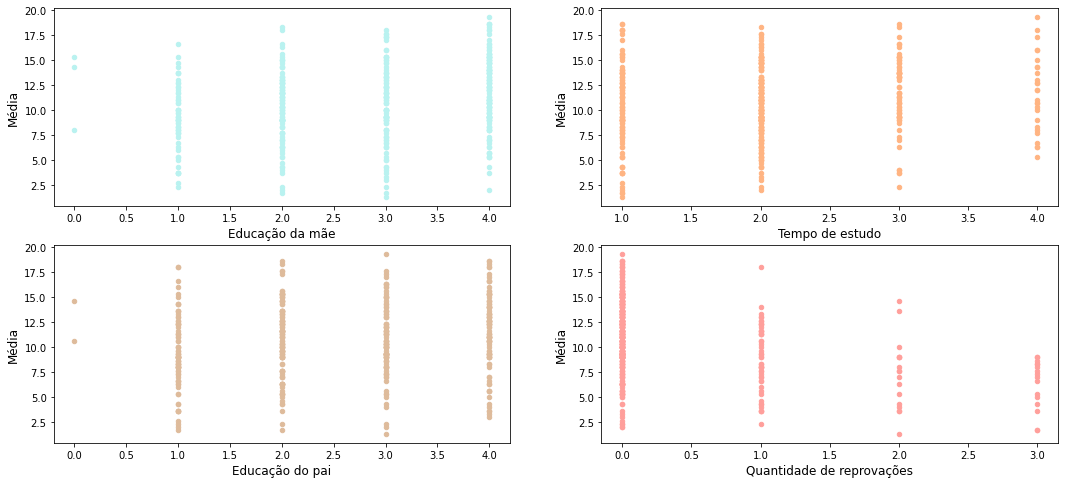

In [405]:
cores = sample(4)

fig, ax = plt.subplots(2, 2, figsize=(18, 8))
df_edu.plot(x='Medu', y='media', kind='scatter', ax=ax[0, 0], color=cores[0])
df_edu.plot(x='studytime', y='media', kind='scatter',
            ax=ax[0, 1], color=cores[1])
df_edu.plot(x='Fedu', y='media', kind='scatter', ax=ax[1, 0], color=cores[2])
df_edu.plot(x='failures', y='media', kind='scatter',
            ax=ax[1, 1], color=cores[3])
ax[0,0].set_xlabel('Educação da mãe',fontsize=12)
ax[1,0].set_xlabel('Educação do pai',fontsize=12)
ax[0,1].set_xlabel('Tempo de estudo',fontsize=12)
ax[1,1].set_xlabel('Quantidade de reprovações',fontsize=12)
ax[0,0].set_ylabel('Média',fontsize=12)
ax[1,0].set_ylabel('Média',fontsize=12)
ax[0,1].set_ylabel('Média',fontsize=12)
ax[1,1].set_ylabel('Média',fontsize=12);
